# Exercise 3 : Exploratory Analysis

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

## Setup : Import the Dataset

Dataset from Kaggle : The **"House Prices"** competition     
Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

The dataset is `train.csv`; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [2]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


---

## Problem 1 : Numeric Variables

Extract the required variables from the dataset, as mentioned in the problem.     
`LotArea`, `GrLivArea`, `TotalBsmtSF`, `GarageArea`, `SalePrice`    

In [3]:
houseNumData = pd.DataFrame(houseData[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])
houseNumData.head()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
0,8450,1710,856,548,208500
1,9600,1262,1262,460,181500
2,11250,1786,920,608,223500
3,9550,1717,756,642,140000
4,14260,2198,1145,836,250000


### Check the Variables Independently

Summary Statistics of `houseNumData`, followed by Statistical Visualizations on the variables. 

In [4]:
houseNumData.describe()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,1057.429452,472.980137,180921.195890
std,9981.264932,525.480383,438.705324,213.804841,79442.502883
min,1300.000000,334.000000,0.000000,0.000000,34900.000000
25%,7553.500000,1129.500000,795.750000,334.500000,129975.000000
50%,9478.500000,1464.000000,991.500000,480.000000,163000.000000
75%,11601.500000,1776.750000,1298.250000,576.000000,214000.000000
max,215245.000000,5642.000000,6110.000000,1418.000000,755000.000000


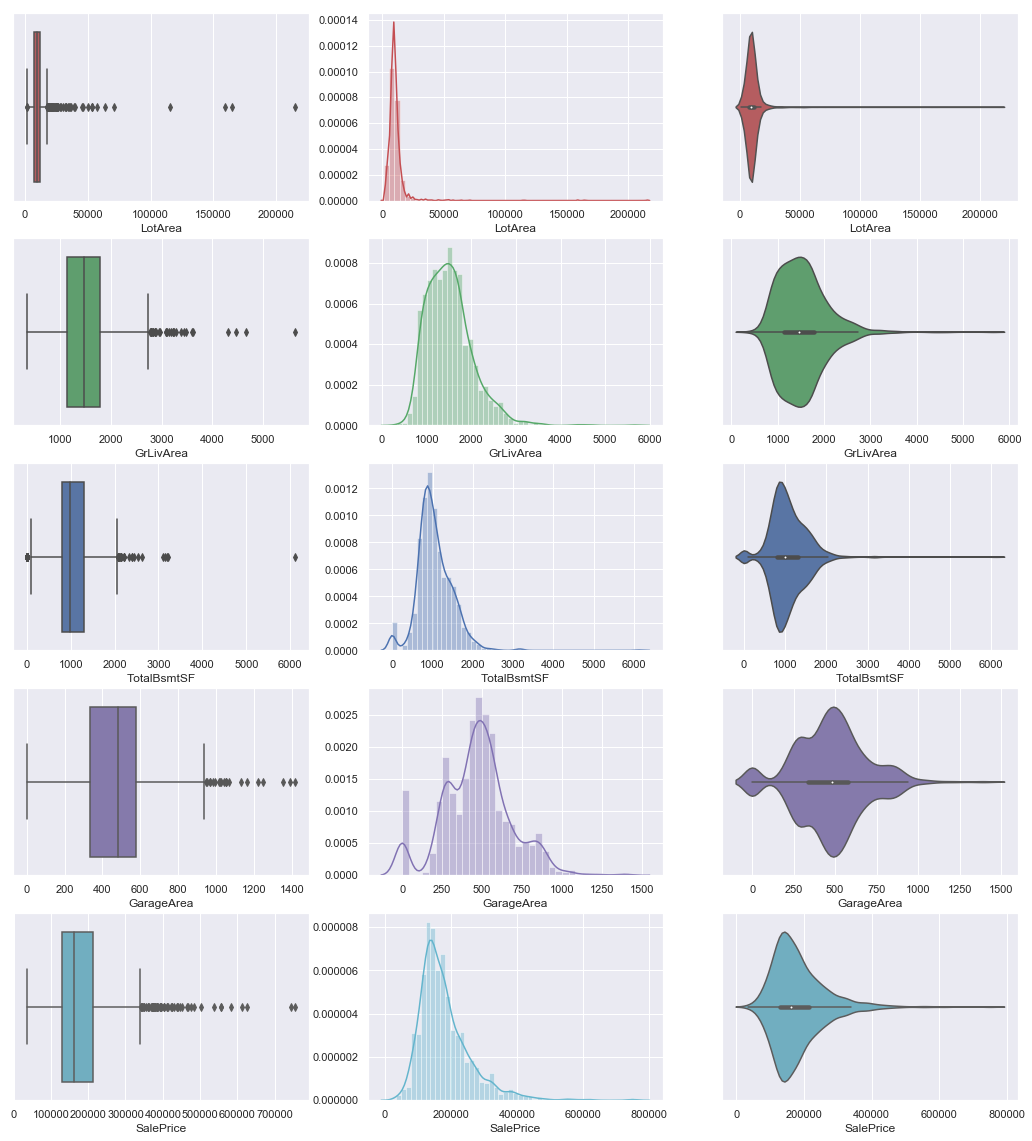

In [5]:
# Draw the distributions of all variables
f, axes = plt.subplots(5, 3, figsize=(18, 20))
colors = ["r", "g", "b", "m", "c"]

count = 0
for var in houseNumData:
    sb.boxplot(houseNumData[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(houseNumData[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(houseNumData[var], color = colors[count], ax = axes[count,2])
    count += 1

### Check the Relationship amongst Variables

Correlation between the variables, followed by all bi-variate jointplots.

              LotArea  GrLivArea  TotalBsmtSF  GarageArea  SalePrice
LotArea      1.000000   0.263116     0.260833    0.180403   0.263843
GrLivArea    0.263116   1.000000     0.454868    0.468997   0.708624
TotalBsmtSF  0.260833   0.454868     1.000000    0.486665   0.613581
GarageArea   0.180403   0.468997     0.486665    1.000000   0.623431
SalePrice    0.263843   0.708624     0.613581    0.623431   1.000000


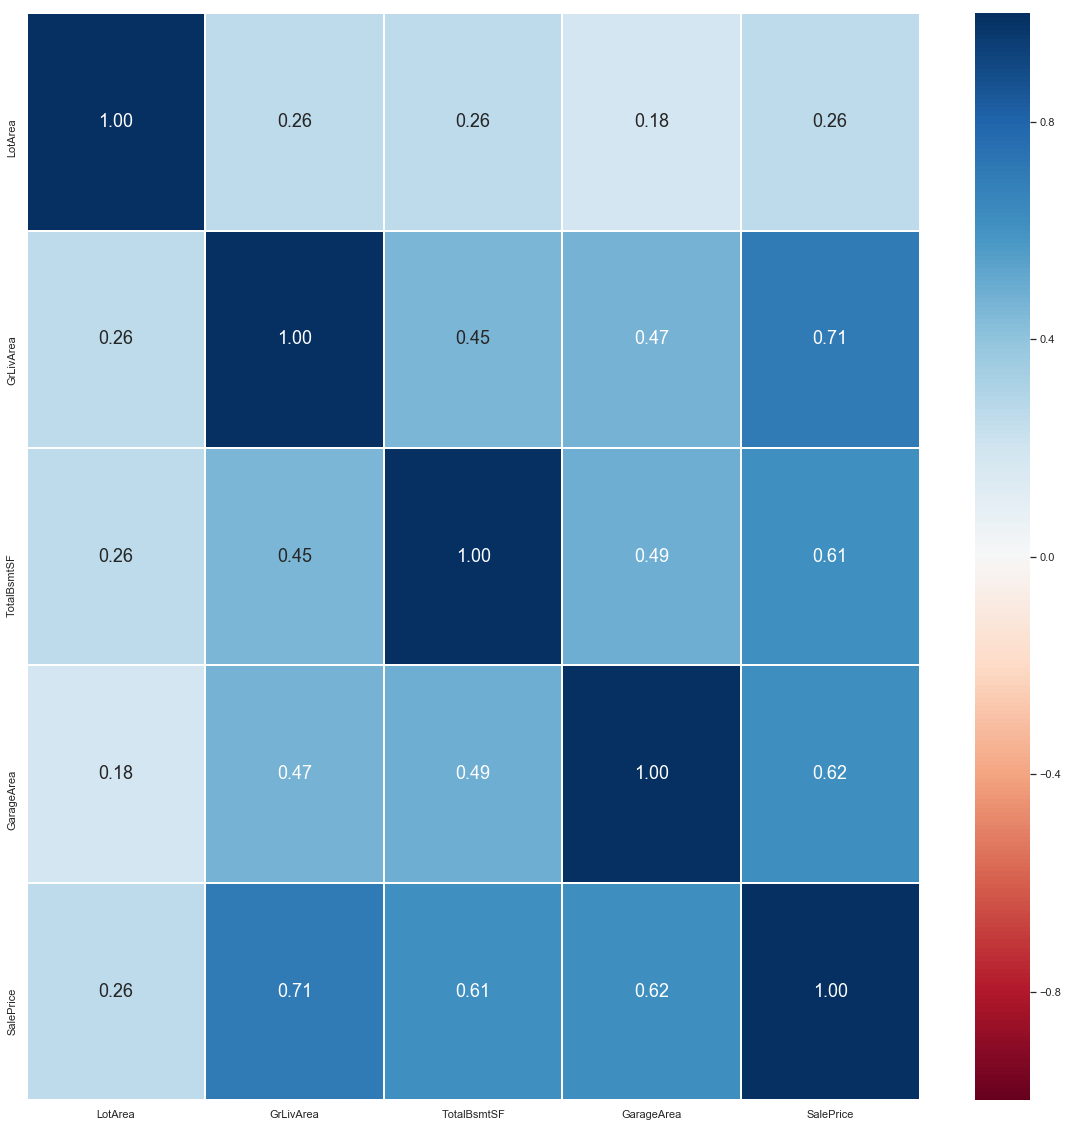

In [6]:
# Correlation Matrix
print(houseNumData.corr())

# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(houseNumData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

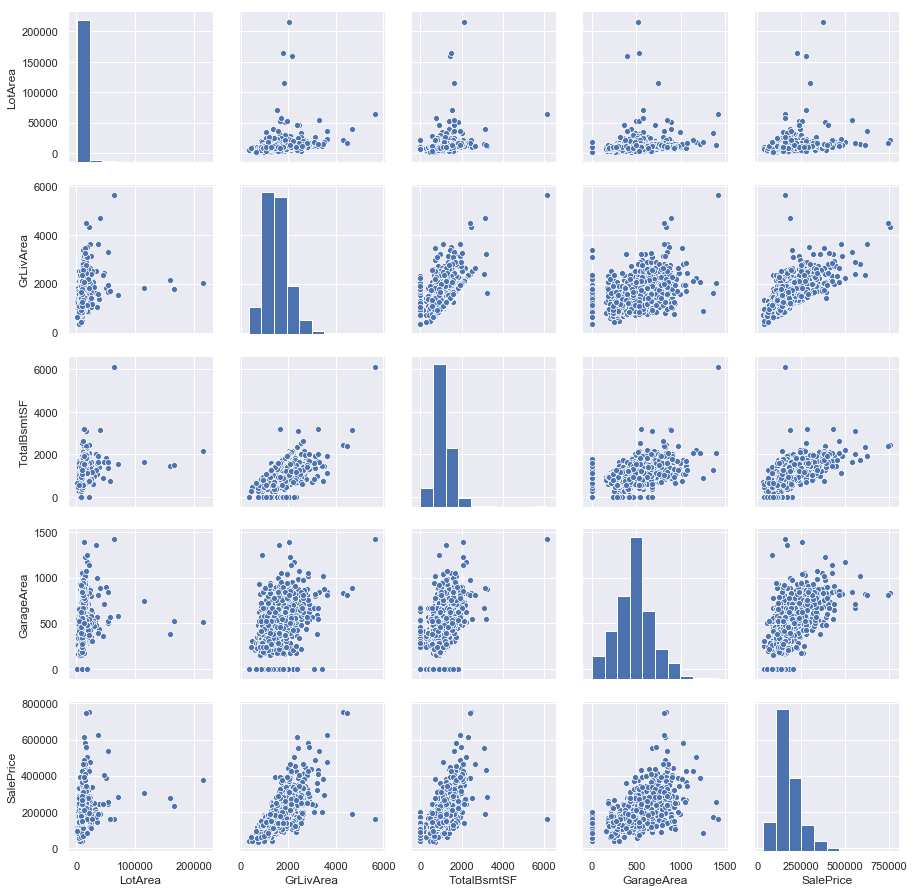

In [7]:
# Draw pairs of variables against one another
sb.pairplot(data = houseNumData)

**Which variables do you think will help us predict `SalePrice` in this dataset?**     

> `GrLivArea` : Possibly the most important variable : Highest Correlation, Strong Linearity    
> `GarageArea` and `TotalBsmtSF` : Important variables : High Correlation, Strong Linearity    
> `LotArea` : Doesn't seem so important as a variable : Low Correlation, Weak Linear Relation

Bonus : Attempt a comprehensive analysis with all *Numeric* variables in the dataset.

---

## Problem 2 : Categorical Variables

Extract the required variables from the dataset, as mentioned in the problem.     
`MSSubClass`, `Neighborhood`, `BldgType`, `OverallQual`

In [8]:
houseCatData = pd.DataFrame(houseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])
houseCatData.head()

,MSSubClass,Neighborhood,BldgType,OverallQual
0,60,CollgCr,1Fam,7
1,20,Veenker,1Fam,6
2,60,CollgCr,1Fam,7
3,70,Crawfor,1Fam,7
4,60,NoRidge,1Fam,8


Fix the data types of the first four variables to convert them to categorical.

In [9]:
houseCatData['MSSubClass'] = houseCatData['MSSubClass'].astype('category')
houseCatData['Neighborhood'] = houseCatData['Neighborhood'].astype('category')
houseCatData['BldgType'] = houseCatData['BldgType'].astype('category')
houseCatData['OverallQual'] = houseCatData['OverallQual'].astype('category')

In [10]:
houseCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
MSSubClass      1460 non-null category
Neighborhood    1460 non-null category
BldgType        1460 non-null category
OverallQual     1460 non-null category
dtypes: category(4)
memory usage: 7.9 KB


### Check the Variables Independently

Summary Statistics of `houseCatData`, followed by Statistical Visualizations on the variables. 

In [11]:
houseCatData.describe()

,MSSubClass,Neighborhood,BldgType,OverallQual
count,1460,1460,1460,1460
unique,15,25,5,10
top,20,NAmes,1Fam,5
freq,536,225,1220,397


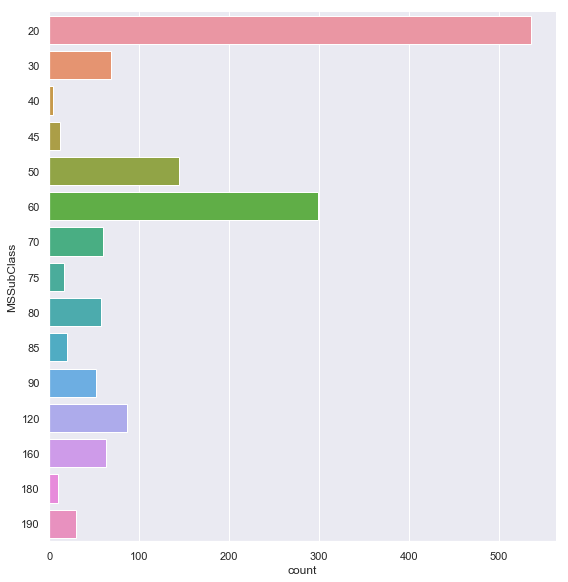

In [12]:
sb.catplot(y = 'MSSubClass', data = houseCatData, kind = "count", height = 8)

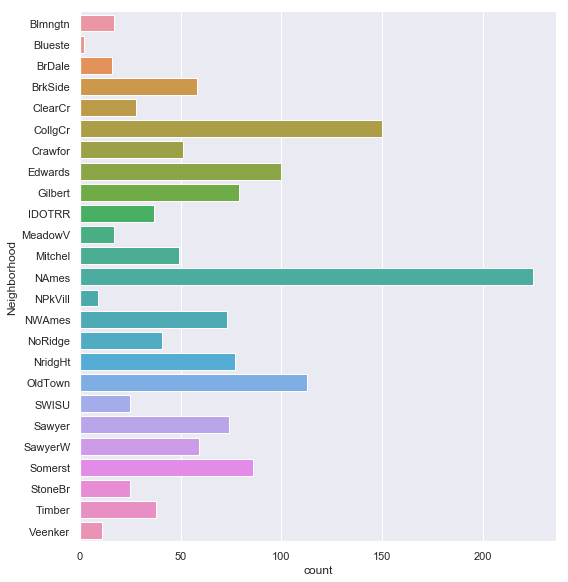

In [13]:
sb.catplot(y = 'Neighborhood', data = houseCatData, kind = "count", height = 8)

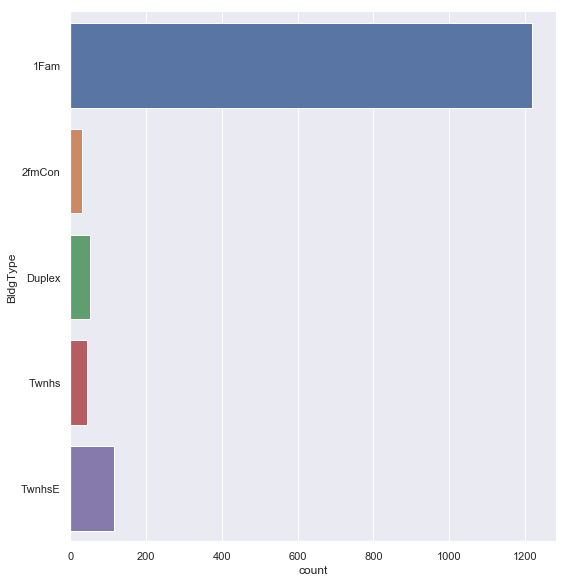

In [14]:
sb.catplot(y = 'BldgType', data = houseCatData, kind = "count", height = 8)

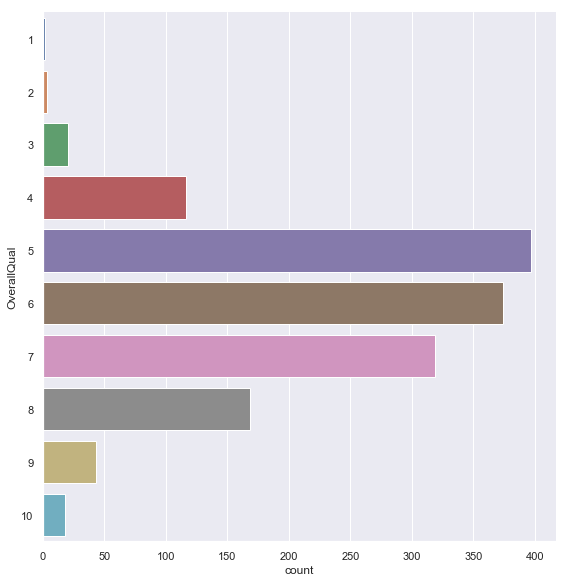

In [15]:
sb.catplot(y = 'OverallQual', data = houseCatData, kind = "count", height = 8)

### Check the Relationship amongst Variables

Joint heatmaps of some of the important bi-variate relationships in `houseCatData`. 

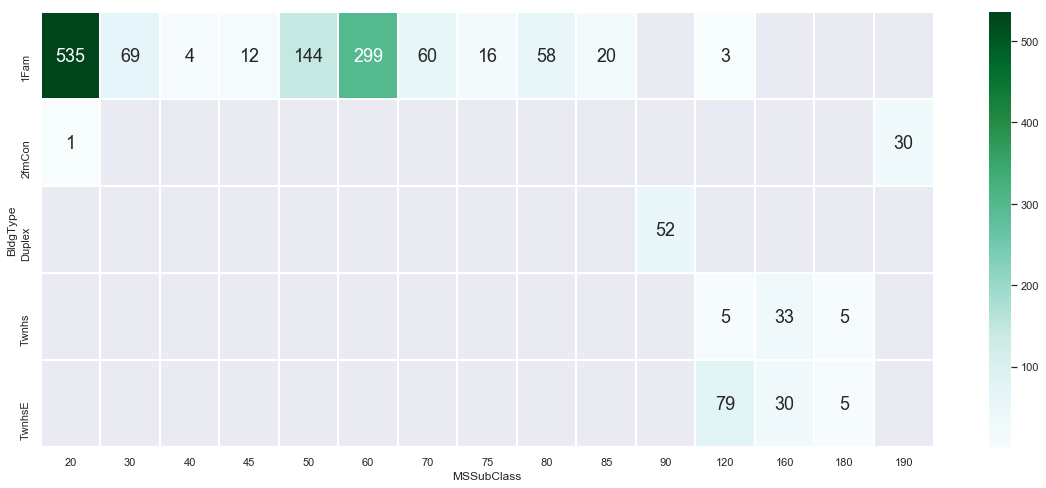

In [20]:
# Distribution of BldgType across MSSubClass
f, axes = plt.subplots(1, 1, figsize=(20, 8))
sb.heatmap(houseCatData.groupby(['BldgType', 'MSSubClass']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

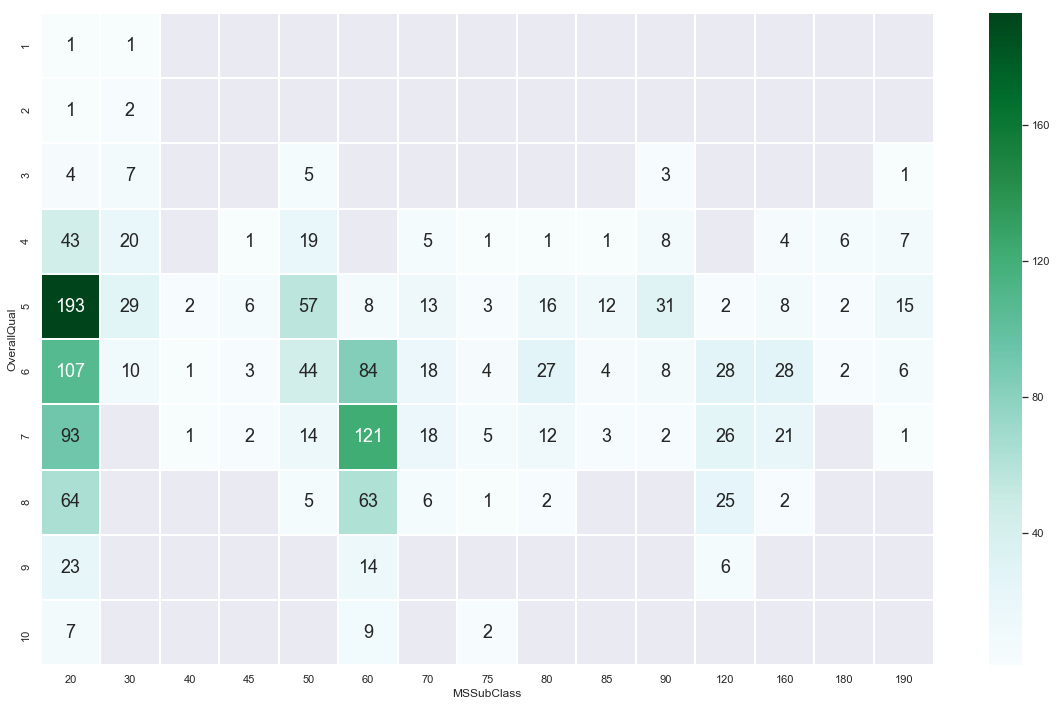

In [32]:
# Distribution of OverallQual across MSSubClass
f, axes = plt.subplots(1, 1, figsize=(20, 12))
sb.heatmap(houseCatData.groupby(['OverallQual', 'MSSubClass']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

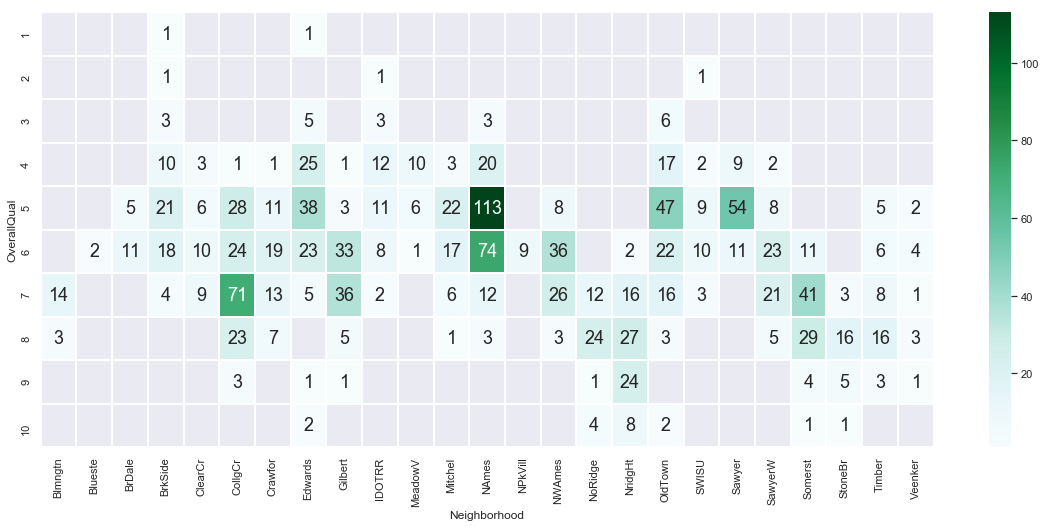

In [22]:
# Distribution of OverallQual across Neighborhood
f, axes = plt.subplots(1, 1, figsize=(20, 8))
sb.heatmap(houseCatData.groupby(['OverallQual', 'Neighborhood']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

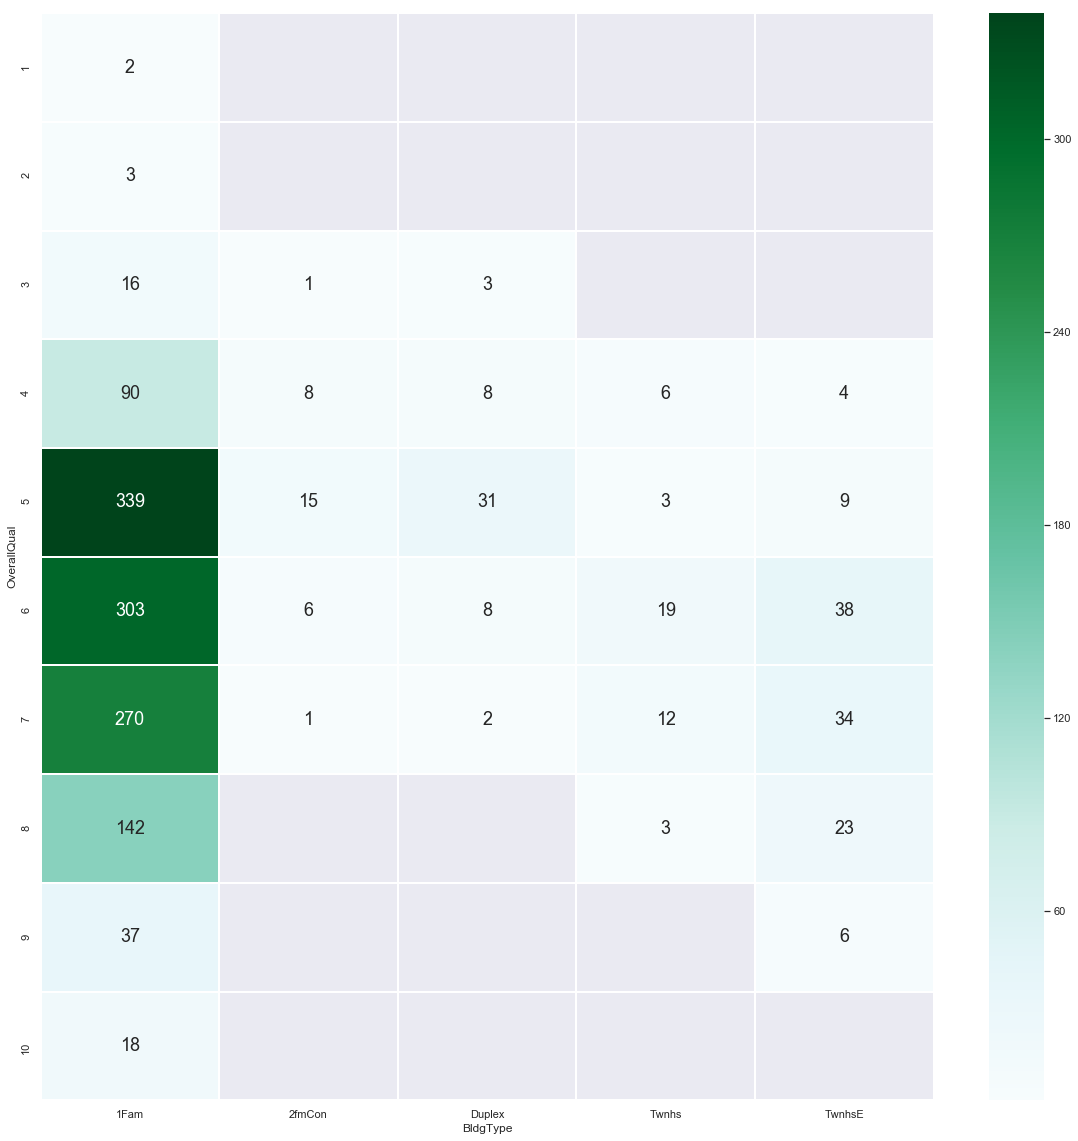

In [23]:
# Distribution of OverallQual across BldgType
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(houseCatData.groupby(['OverallQual', 'BldgType']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

### Check the effect of the Variables on SalePrice

Create a joint DataFrame by concatenating `SalePrice` to `houseCatData`.   

In [24]:
saleprice = pd.DataFrame(houseData['SalePrice'])
houseCatSale = pd.concat([houseCatData, saleprice], axis = 1, join_axes = [houseCatData.index])
houseCatSale.head()

,MSSubClass,Neighborhood,BldgType,OverallQual,SalePrice
0,60,CollgCr,1Fam,7,208500
1,20,Veenker,1Fam,6,181500
2,60,CollgCr,1Fam,7,223500
3,70,Crawfor,1Fam,7,140000
4,60,NoRidge,1Fam,8,250000


Check the distribution of `SalePrice` across different `MSSubClass`.

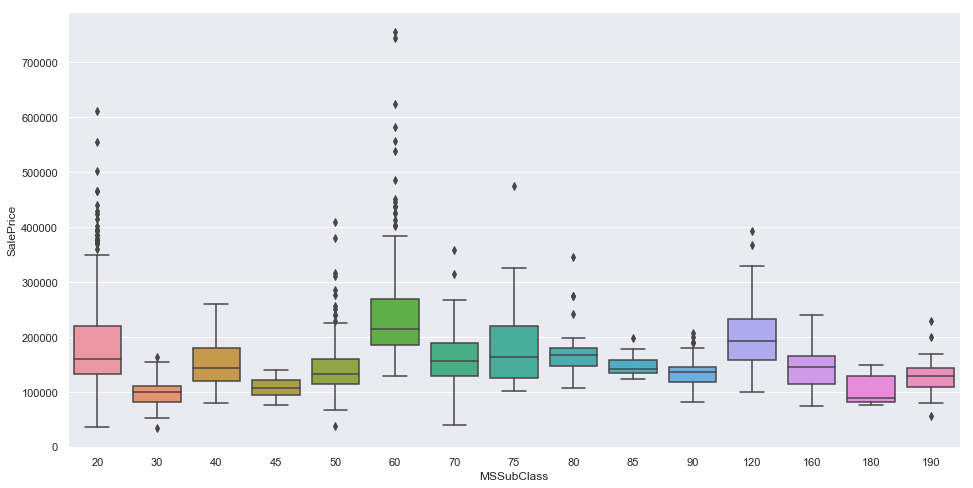

In [25]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'MSSubClass', y = 'SalePrice', data = houseCatSale)

Check the distribution of `SalePrice` across different `Neighborhood`.

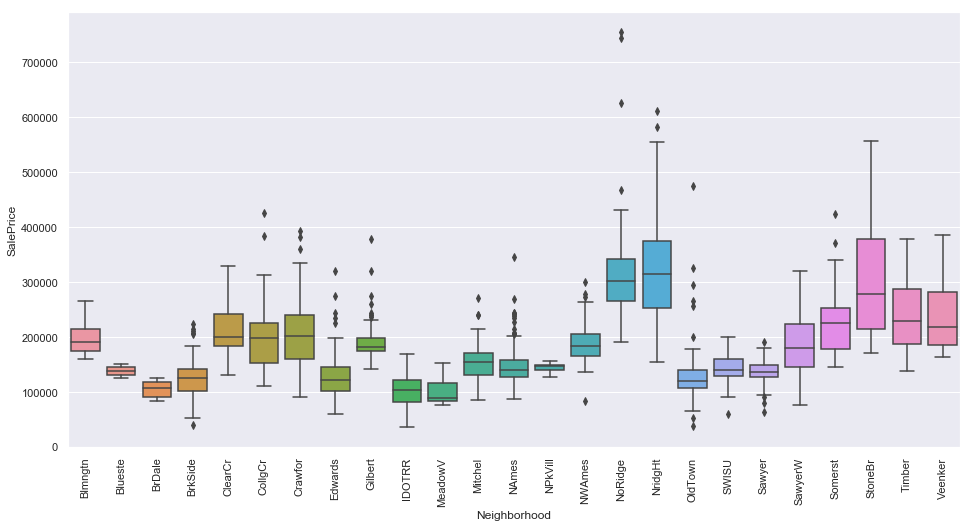

In [26]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'Neighborhood', y = 'SalePrice', data = houseCatSale)
plt.xticks(rotation=90);

Check the distribution of `SalePrice` across different `BldgType`.

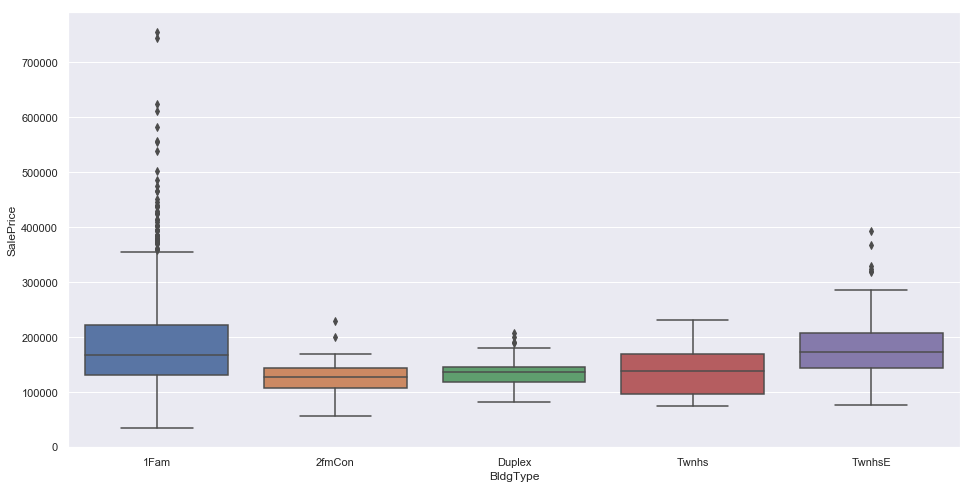

In [29]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'BldgType', y = 'SalePrice', data = houseCatSale)

Check the distribution of `SalePrice` across different `OverallQual`.

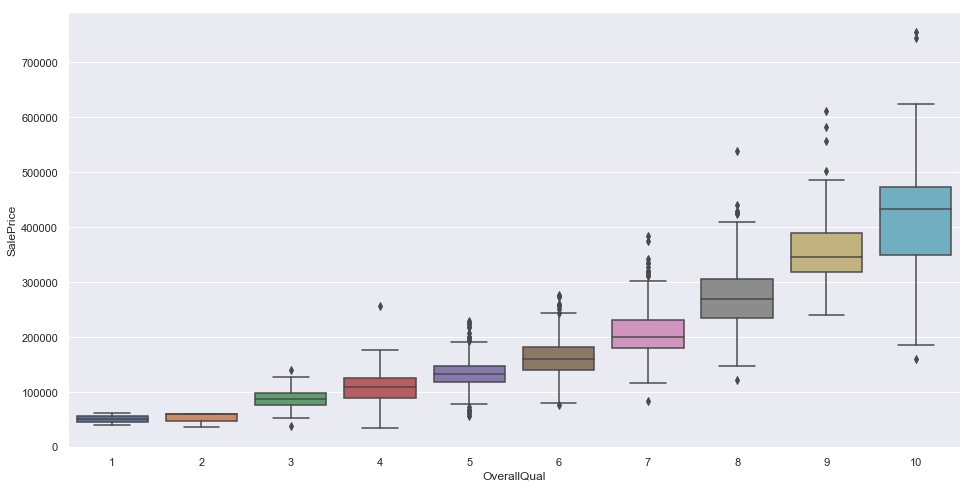

In [24]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'OverallQual', y = 'SalePrice', data = houseCatSale)

**Which variables do you think will help us predict `SalePrice` in this dataset?**     

> `OverallQual` : Definitely the most important variable : Highest variation in `SalePrice` across the levels   
> `Neighborhood` and `MSSubClass` : Moderately important variables : Medium variation in `SalePrice` across levels   
> `BldgType` : Not clear if important as a variable at all : Not much variation in `SalePrice` across the levels   

Bonus : Attempt a comprehensive analysis with all *Categorical* variables in the dataset.